In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
import numpy as np
import scinot as sn
import openpyxl as xl
import os
pd.__version__

'2.1.1'

In [6]:
temp = 'concatenado.csv'
temp_bars = pd.read_csv(temp)
temp_bars

,Test no,Test Name,Learner,Trainer,Num Eye,Selected,Correctness,Intensity,C1,C2,C3,C4,Date,Answering Time (ms),Sexo
0,1,vulnerabilidad,Ana,Giorgio,5,Preocupado,Correcto,7,Preocupado,Irritado,Sarcástico,Amistoso,[2023-11-26 22:31(39.309)],25562,Mujer
1,2,vulnerabilidad,Ana,Giorgio,6,Fantaseando,Correcto,3,Fantaseando,Horrorizado,Impaciente,Alarmado,[2023-11-26 22:31(56.563)],17253,Mujer
2,3,vulnerabilidad,Ana,Giorgio,10,Cauteloso,Correcto,4,Cauteloso,Insistente,Aburrido,Horrorizado,[2023-11-26 22:32(15.13)],18450,Mujer
3,4,vulnerabilidad,Ana,Giorgio,9,Hostil,Incorrecto,5,Preocupado,Molesto,Hostil,Aterrorizado,[2023-11-26 22:32(39.626)],24613,Mujer
4,5,vulnerabilidad,Ana,Giorgio,13,Tímido,Incorrecto,5,Anticipando,Decidido,Amenazante,Tímido,[2023-11-26 22:33(12.514)],32888,Mujer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,32,vulnerabilidad,alejandro,vane,15,Contemplativo,Correcto,6,Contemplativo,Desconcertado,Alentador,Entretenido,[2023-11-26 22:53(33.889)],19333,Hombre
824,33,vulnerabilidad,alejandro,vane,17,Dudoso,Correcto,6,Dudoso,Cariñoso,Juguetón,Horrorizado,[2023-11-26 22:53(44.113)],10224,Hombre
825,34,vulnerabilidad,alejandro,vane,32,serio,Correcto,7,serio,Desconcertado,Avergonzado,Alarmado,[2023-11-26 22:53(58.476)],14362,Hombre
826,35,vulnerabilidad,alejandro,vane,34,Desconcertado,Incorrecto,4,Desconfiado,Desconcertado,Horrorizado,Aterrorizado,[2023-11-26 22:54(32.381)],33904,Hombre


In [7]:
temp_bars.describe()

,Test no,Num Eye,Intensity,Answering Time (ms)
count,828.000000,828.000000,828.000000,828.000000
mean,20.108696,18.500000,5.309179,12945.852657
std,12.847172,10.394574,1.323607,11183.650452
min,1.000000,1.000000,1.000000,933.000000
25%,10.000000,9.750000,5.000000,6290.500000
50%,19.000000,18.500000,6.000000,9068.500000
75%,29.000000,27.250000,6.000000,15125.500000
max,73.000000,36.000000,7.000000,86533.000000


In [8]:
temp_bars[' Test Name'].value_counts()

 Test Name
 poder             504
 vulnerabilidad    324
Name: count, dtype: int64

In [9]:
temp_bars[' Correctness'].value_counts()

 Correctness
 Correcto      555
 Incorrecto    273
Name: count, dtype: int64

In [10]:
K_aciertos = temp_bars[' Correctness'].value_counts().iloc[0]
N_datos = temp_bars.shape[0]
print('Cantidad de aciertos:', K_aciertos, 'Total de experimentos:', N_datos)
p = 0.5
res = stats.binomtest(K_aciertos, N_datos, p, alternative = 'greater')
if (res.pvalue < 0.05):
    print('El sujeto ha tenido un:', K_aciertos / N_datos * 100, '% de acierto (p =', res.pvalue, '< 0.05)')
else:
    print('No se encontró evidencia estadística para afirmar que el sujeto ha tenido un porcentaje de acierto diferente del 50%')

Cantidad de aciertos: 555 Total de experimentos: 828
El sujeto ha tenido un: 67.02898550724638 % de acierto (p = 3.033601956832594e-23 < 0.05)


In [11]:
contigency_all = pd.crosstab(temp_bars[' Correctness'], temp_bars[' Test Name'], normalize = 'columns')
contigency_all

Test Name,poder,vulnerabilidad
Correctness,,
Correcto,0.668651,0.67284
Incorrecto,0.331349,0.32716


<Axes: xlabel=' Test Name', ylabel=' Correctness'>

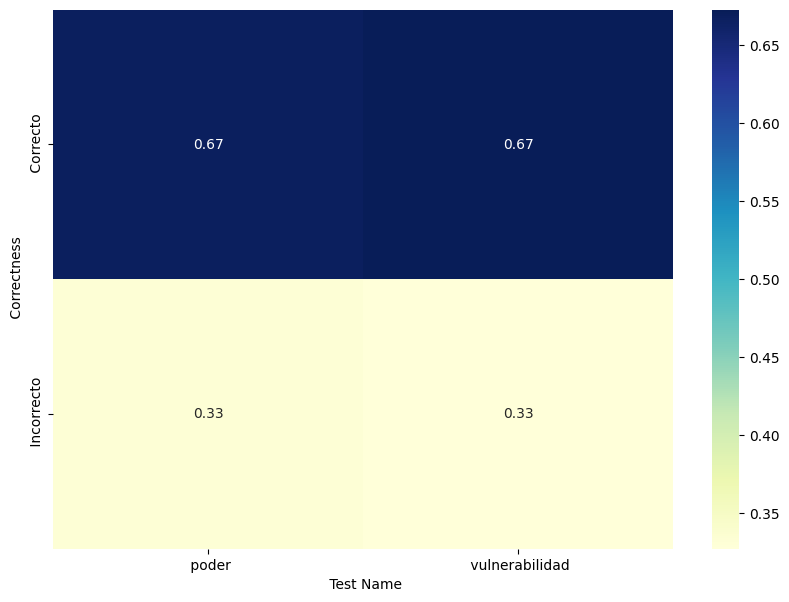

In [12]:
plt.figure(figsize = (10, 7))
sns.heatmap(contigency_all, annot = True, cmap = "YlGnBu")

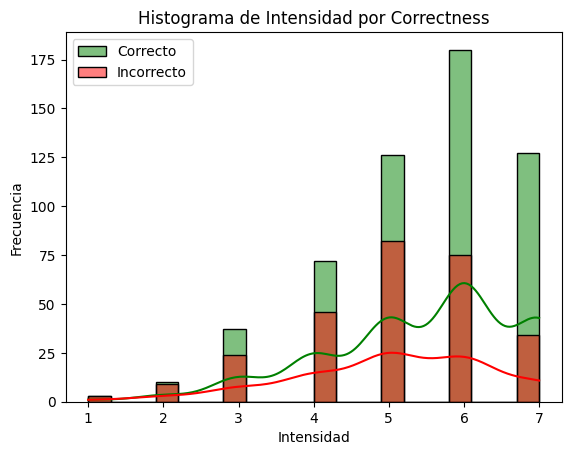

In [13]:
# Crear un histograma para respuestas correctas
sns.histplot(data=temp_bars[temp_bars[' Correctness'] == ' Correcto'], x=' Intensity', bins=20, kde=True, color='green', label='Correcto')

# Crear un histograma para respuestas incorrectas
sns.histplot(data=temp_bars[temp_bars[' Correctness'] == ' Incorrecto'], x=' Intensity', bins=20, kde=True, color='red', label='Incorrecto')

# Configurar el gráfico
plt.title('Histograma de Intensidad por Correctness')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

In [14]:
c, p, dof, expected = stats.chi2_contingency(contigency_all)

print("Valor de p: ", p)
if(p < 0.05):
    print("No se rechaza la hipotesis nula")
    

Valor de p:  1.0


In [15]:
comb = combinations(range(1, 10), 4)
comb_list = list(comb)

In [16]:
correct_values = temp_bars[' Correctness'].value_counts()
correct_values

 Correctness
 Correcto      555
 Incorrecto    273
Name: count, dtype: int64

In [17]:
# Contar la cantidad de personas que eligieron cada opción en la columna "Test Name"
count_per_option = temp_bars[' Test Name'].value_counts()
count_per_option = count_per_option / 36
# Mostrar el resultado
count_per_option

 Test Name
 poder             14.0
 vulnerabilidad     9.0
Name: count, dtype: float64

In [18]:
poder_data = temp_bars[temp_bars[' Test Name'] == ' poder']
vulnerabilidad_data = temp_bars[temp_bars[' Test Name'] == ' vulnerabilidad']

In [19]:
def analyze_data_intensity(data, test_name):
    # Realizar el análisis específico para cada conjunto de datos (data)
    
    # Ejemplo de análisis: Calcular estadísticas del tiempo de respuesta
    response_intensity = data[' Intensity']
    mean_response_intensity = response_intensity.mean()
    median_response_intensity = response_intensity.median()
    min_response_intensity = response_intensity.min()
    max_response_intensity = response_intensity.max()
    std_response_intensity = response_intensity.std()
    
    print('Análisis de tiempos de respuesta para', test_name)
    print('Media del tiempo de respuesta:', mean_response_intensity)
    print('Mediana del tiempo de respuesta:', median_response_intensity)
    print('Tiempo de respuesta mínimo:', min_response_intensity)
    print('Tiempo de respuesta máximo:', max_response_intensity)
    print('Desviación estándar del tiempo de respuesta:', std_response_intensity)
    
    # Puedes continuar con otros análisis específicos para el tiempo de respuesta

# Llamar a la función para analizar los tiempos de respuesta de "poder"
analyze_data_intensity(poder_data, "poder")
print("\n")
# Llamar a la función para analizar los tiempos de respuesta de "vulnerabilidad"
analyze_data_intensity(vulnerabilidad_data, "vulnerabilidad")

Análisis de tiempos de respuesta para poder
Media del tiempo de respuesta: 5.277777777777778
Mediana del tiempo de respuesta: 5.0
Tiempo de respuesta mínimo: 1
Tiempo de respuesta máximo: 7
Desviación estándar del tiempo de respuesta: 1.414994335116488


Análisis de tiempos de respuesta para vulnerabilidad
Media del tiempo de respuesta: 5.3580246913580245
Mediana del tiempo de respuesta: 6.0
Tiempo de respuesta mínimo: 2
Tiempo de respuesta máximo: 7
Desviación estándar del tiempo de respuesta: 1.167767757301153


In [20]:
def analyze_data_time(data, test_name):
    # Realizar el análisis específico para cada conjunto de datos (data)
    
    # Ejemplo de análisis: Calcular estadísticas del tiempo de respuesta
    response_times = data[' Answering Time (ms)']
    mean_response_time = response_times.mean()
    median_response_time = response_times.median()
    min_response_time = response_times.min()
    max_response_time = response_times.max()
    std_response_time = response_times.std()
    
    print('Análisis de tiempos de respuesta para', test_name)
    print('Media del tiempo de respuesta:', mean_response_time)
    print('Mediana del tiempo de respuesta:', median_response_time)
    print('Tiempo de respuesta mínimo:', min_response_time)
    print('Tiempo de respuesta máximo:', max_response_time)
    print('Desviación estándar del tiempo de respuesta:', std_response_time)
    
    # Puedes continuar con otros análisis específicos para el tiempo de respuesta

# Llamar a la función para analizar los tiempos de respuesta de "poder"
analyze_data_time(poder_data, "poder")
print("\n")
# Llamar a la función para analizar los tiempos de respuesta de "vulnerabilidad"
analyze_data_time(vulnerabilidad_data, "vulnerabilidad")

Análisis de tiempos de respuesta para poder
Media del tiempo de respuesta: 12545.45634920635
Mediana del tiempo de respuesta: 8862.5
Tiempo de respuesta mínimo: 933
Tiempo de respuesta máximo: 86533
Desviación estándar del tiempo de respuesta: 10842.234529859446


Análisis de tiempos de respuesta para vulnerabilidad
Media del tiempo de respuesta: 13568.691358024691
Mediana del tiempo de respuesta: 9270.0
Tiempo de respuesta mínimo: 3416
Tiempo de respuesta máximo: 77925
Desviación estándar del tiempo de respuesta: 11684.719647287844
